<h1><center>Laboratorio 3: El Pandas no muerde 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Javiera Donoso
- Nombre de alumno 2: Belén Ordenes


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/javieradonoso/Repositorio-MDS7202)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1015]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos.
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados.




In [1016]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1. Carga e Inspección de Datos [1.0 Puntos]


<p align="center">
  <img src="https://i.imgur.com/44knnIf.png" width="500" height="500">
</p>

*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset.


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [1017]:
df_grades = pd.read_json('students_grades.json')
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **1000** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **1000** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier registro que posea un valor diferente a esta escala, **debería ser eliminado de la base de datos**.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas.

**To-Do**
1. [ ] Imprimir un mensaje con las dimensiones del Dataframe.
2. [ ] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [ ] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [ ] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [ ] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [ ] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [ ] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [ ] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).

Finalmente, responda las siguientes preguntas (comente esto en la celda ubicada debajo de **justificación**.):

9. [ ] ¿Qué anomalías es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados?


10. [ ] Su compañero ChatGPT le provee un código para que pueda entender los resultados de las pruebas desde un gráfico. ¿Qué puede interpretar de la distribución de las notas en el boxplot?

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c)

**Respuesta:**

In [1018]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   names                        1400 non-null   object
 1   gender                       1400 non-null   object
 2   race/ethnicity               1400 non-null   object
 3   parental level of education  1400 non-null   object
 4   lunch                        1400 non-null   object
 5   test preparation course      1400 non-null   object
 6   math score                   1400 non-null   object
 7   reading score                1400 non-null   object
 8   writing score                1400 non-null   object
dtypes: object(9)
memory usage: 98.6+ KB


Las columnas de puntaje son del tipo object, pero deberían ser numéricas, por lo que se decide cambiar.

In [1019]:
# Convertir las columnas de puntaje a tipo float
df_grades['math score'] = pd.to_numeric(df_grades['math score'], errors='coerce')
df_grades['reading score'] = pd.to_numeric(df_grades['reading score'], errors='coerce')
df_grades['writing score'] = pd.to_numeric(df_grades['writing score'], errors='coerce')

# Verificar los tipos de datos después de la conversión
df_grades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   names                        1400 non-null   object 
 1   gender                       1400 non-null   object 
 2   race/ethnicity               1400 non-null   object 
 3   parental level of education  1400 non-null   object 
 4   lunch                        1400 non-null   object 
 5   test preparation course      1400 non-null   object 
 6   math score                   1360 non-null   float64
 7   reading score                1360 non-null   float64
 8   writing score                1353 non-null   float64
dtypes: float64(3), object(6)
memory usage: 98.6+ KB


In [1020]:
def exploratory_data_analysis(dataframe):
   # 1. Imprimir dimensiones del DataFrame
    print(f"1) El dataset tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")

    # 2. Imprimir nombres de las columnas
    print(f"2) Nombres de las columnas: {dataframe.columns.tolist()}")


    # 3. Mostrar los primeros 5, los últimos 5 elementos del DataFrame y un muestreo aleatorio de 5 elementos
    print("3.1) Primeros 5 elementos del DataFrame:")
    display(dataframe.head())

    print("3.2) Últimos 5 elementos del DataFrame:")
    display(dataframe.tail())

    print("3.3) Muestreo aleatorio de 5 elementos del DataFrame:")
    display(dataframe.sample(5))


    # 4. Descripción rápida de las variables numéricas
    print("4. Descripción numérica del DataFrame:")
    display(dataframe.describe(include = 'number'))
   

    # 5. Cantidad de valores nulos
    print(f"5) Cantidad de valores nulos por columna:\n{dataframe.isna().sum()}")


    # 6. Cantidad de valores únicos por columna
    print(f"6) Cantidad de valores únicos por columna:\n{dataframe.nunique()}")


    # 7. Total de filas que contengan nombres duplicados
    duplicados = dataframe.duplicated(subset=["names"])
    duplicados_print = duplicados.sum()
    print(f"7) Total de filas duplicadas: {duplicados_print}")


    # 8. Filas que contengan nombres duplicados
    duplicated_data = dataframe[dataframe.loc[:, ['names']].duplicated()]
    print("8) Filas que contienen nombres duplicados:")
    display(duplicated_data)
    pass


In [1021]:
exploratory_data_analysis(df_grades)

1) El dataset tiene 1400 filas y 9 columnas
2) Nombres de las columnas: ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
3.1) Primeros 5 elementos del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


3.2) Últimos 5 elementos del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


3.3) Muestreo aleatorio de 5 elementos del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1167,Julia Hagan,female,group C,bachelor's degree,free/reduced,completed,74.0,86.0,89.0
449,Tracy Fowler,female,group E,associate's degree,standard,none,84.0,95.0,92.0
1186,George Lindsay,male,group E,some high school,free/reduced,completed,73.0,67.0,59.0
34,Elbert Anderson,male,group C,some college,standard,none,NaN,NaN,142.0
1125,Shirley Ybanez,female,group C,some high school,standard,completed,44.0,51.0,55.0


4. Descripción numérica del DataFrame:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000


5) Cantidad de valores nulos por columna:
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64
6) Cantidad de valores únicos por columna:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64
7) Total de filas duplicadas: 247
8) Filas que contienen nombres duplicados:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0


In [1022]:
# Código del amigo ChatGPT (listo para usar)
fig = px.box(
    df_grades.melt(
        value_vars=["math score", "reading score", "writing score"],
        var_name="subject",
        value_name="score",
    ),
    y="score",
    color="subject",
)
fig.show()

**Justificación:**

Primero, al realizar la función se pide investigar sobre algunos métodos y funciones de pandas, uno de ellos es `isna()` y `sum()`, el primero es un método en pandas que se utiliza para detectar valores nulos en un DataFrame o Serie, devolviendo un conjunto de valores booleanos donde `True` indica la presencia de un valor nulo. Por otro lado, `sum()` es un método de agregación que suma valores a lo largo de un eje en un DataFrame o Serie. Cuando se usa después de `isna()`, `sum()` cuenta la cantidad de valores nulos en cada columna o fila, dependiendo del eje especificado. 

Otra de las funciones que se pide investigar es `nunique()`, el cual se utiliza para contar el número de valores únicos en cada columna de un DataFrame o en una Serie. `nunique()` también permite especificar si se deben contar o no los valores nulos como parte de los valores únicos. 

Por último, `duplicated()`se utiliza para identificar filas duplicadas en un DataFrame, devolviendo una Serie booleana donde True indica que una fila es un duplicado de una anterior. El parámetro `subset` en `duplicated()` permite especificar una o más columnas a considerar al determinar si una fila es un duplicado. Al utilizar subset, se puede centrar la búsqueda de duplicados solo en las columnas relevantes, ignorando las demás.



9. [ ] ¿Qué anomalías es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados?

- Una de las anomalías encontradas es que se puede observar que hay 1400 filas en el DataFrame, sin embargo, solo se tienen 1153 valores únicos, mientras que se encuentran 247 valores duplicados. Por otro lado, es posible observar que se observan valores mayores a 100 y esto no debería ocurrir, puesto que dadas las indicaciones del enunciado, los valores de logro están entre un 0 y 100. 

- Por otra parte, en un principió se observó que las columnas de puntajes estaban determinadas como objetos, no en formato int o float, por lo que se decide pasar estas columnas a numéricas, y con ello, se observa que si existen datos nulos (anteriormente no se observaban datos nulos). También la columna de "Test preparation course" presenta en su gran mayoría valores nulos, esto quiere decir que para la mayoría de los estudiantes, no se tiene conocimientos sobre si dieron alguna prueba de preparación o al parecer no la dieron





10. [ ] Su compañero ChatGPT le provee un código para que pueda entender los resultados de las pruebas desde un gráfico. ¿Qué puede interpretar de la distribución de las notas en el boxplot?

- En primer lugar, la distribución de los puntajes de matemáticas parece ligeramente sesgada hacia la izquierda (negativa), dado que la mediana está más cerca del cuartil superior de la caja. Esto indica que la mayoría de los estudiantes tienden a tener puntajes en el rango medio-alto, pero hay algunos que tienen puntajes más bajos. Mientras que en los puntajes de lecturas  parece más simétrica, con la mediana aproximadamente en el centro de la caja, lo que sugiere que los puntajes están más equilibrados en torno a la mediana. Por otro lado, los puntajes de escritura parecieran estar sesgada hacia la derecha (positiva), indicando que un mayor número de estudiantes tiene puntajes más altos.

- La concentración de notas de los puntajes de matemáticas es más pequeña, lo que indica que los puntajes están más concentrados alrededor de la mediana, sugiriendo menor variabilidad en comparación con las otras asignaturas. En lectura y escritura, las cajas son más grandes, lo que indica una mayor dispersión de los puntajes, particularmente en escritura, donde hay una mayor variabilidad.

- La presencia de outliers en las tres asignaturas indica que hay estudiantes cuyos puntajes se desvían considerablemente del resto. En matemáticas, los outliers están principalmente en el extremo inferior, lo que podría sugerir que algunos estudiantes les fue mal en esta asignatura. En lectura y escritura, hay outliers en ambos extremos, pero la escritura tiene más outliers en el extremo superior, lo que indica que algunos estudiantes tuvieron buenas notas en esta asignatura.

## 2 Limpieza de Datos [1.0 puntos]




<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>

En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y **cree una función** que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**
- [ ] Eliminar registros con valores nulos.
- [ ] Eliminar valores fuera del rango válido.
- [ ] Eliminar registros con nombres duplicados
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hints**

- Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.
- Cuidado con el orden en la limpieza de datos. ¿Que se debe eliminar primero, los nombres duplicados o los registros fuera del rango posible?


> Utilice la función creada en el punto 1 para verificar sus resultados.

**Respuesta:**

In [1023]:
# Escriba su código aquí
def clean_data(dataframe):
    # 1. Eliminar registros con valores nulos
    dataframe = dataframe.dropna()

    # 2. Eliminar valores fuera del rango válido, los valores de puntaje deben estar entre 0 y 100
    valid_range = (dataframe['math score'].between(0, 100)) & \
                  (dataframe['reading score'].between(0, 100)) & \
                  (dataframe['writing score'].between(0, 100))
    dataframe = dataframe[valid_range]

    # 3. Eliminar registros con nombres duplicados
    dataframe = dataframe.drop_duplicates(subset='names')
    return dataframe

In [1024]:
#Pruebe su código aquí
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


In [1025]:
exploratory_data_analysis(df_grades)

1) El dataset tiene 1000 filas y 9 columnas
2) Nombres de las columnas: ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
3.1) Primeros 5 elementos del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0


3.2) Últimos 5 elementos del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


3.3) Muestreo aleatorio de 5 elementos del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
543,Karen Hankinson,female,group E,associate's degree,free/reduced,none,70.0,84.0,81.0
790,Diana Bertran,female,group E,some college,standard,completed,66.0,74.0,73.0
1195,Lorena Reed,female,group C,high school,free/reduced,none,36.0,53.0,43.0
270,Ivan King,male,group D,some college,free/reduced,none,61.0,47.0,56.0
506,Damien Gomez,male,group C,bachelor's degree,free/reduced,completed,70.0,75.0,74.0


4. Descripción numérica del DataFrame:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


5) Cantidad de valores nulos por columna:
names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
6) Cantidad de valores únicos por columna:
names                          1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64
7) Total de filas duplicadas: 0
8) Filas que contienen nombres duplicados:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


**Justificación:**

Se utiliza nuevamente la función creada en la parte 1 y se puede observar que no hay datos nulos, y que los valores de puntaje se encuentran en los rangos correspondientes. Además, se borraron los datos duplicados y en consecuencia, se obtienen exactamente las 1000 filas que deberían.

## 3. Trabajando con Datos [2.0 puntos]

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 3.1 Transformación de notas a "Nota Chilena" [0.3 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [1026]:
def nota_chilena(dataframe_in, columna):
    dataframe = dataframe_in.copy()
    dataframe[columna] = (dataframe[columna] * 0.06 + 1).round(2)
    return dataframe

In [1027]:
df_grades = nota_chilena(df_grades, 'math score')
df_grades = nota_chilena(df_grades, 'reading score')
df_grades = nota_chilena(df_grades, 'writing score')

df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


### 3.2 Obtención de promedio de alumnos [0.3 Puntos]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [1028]:
#Escriba su código aquí
def alumnos_promedio(dataframe_in):
  dataframe = dataframe_in.copy()
  dataframe['GPA'] = dataframe.iloc[:,6:].mean(axis=1).round(2)
  return dataframe

In [1029]:
#Muestre sus resultados aquí
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 3.3 Reprobados y Destacados [0.9 Puntos, 0.3 cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes:
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [1030]:
def reprobados_destacados(dataframe_in):
    # dataframe reprobados
    reprobados = dataframe_in[dataframe_in["GPA"] < 4.0].reset_index(drop=True)
    # dataframe con reemplazo R
    df_con_r = dataframe_in.copy()
    df_con_r["GPA"] = dataframe_in["GPA"].apply(lambda x: "R" if x < 4 else x)
    # alumnos detacados
    destacados = dataframe_in[(dataframe_in["math score"] > 5.8) & (dataframe_in["reading score"] > 5.8) & (dataframe_in["writing score"] > 5.8)].reset_index(drop=True)
    # ordenamos por promedio
    destacados = destacados.sort_values(ascending=False, by="GPA").reset_index(drop=True)
    
    return reprobados, df_con_r, destacados


In [1031]:
# Muestre sus resultados aquí
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)

In [1032]:
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
2,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
3,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
4,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
98,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
99,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
100,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
101,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [1033]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [1034]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
1,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
2,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
3,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
4,Angela Cressey,female,group D,some college,standard,none,6.88,7.00,6.94,6.94
...,...,...,...,...,...,...,...,...,...,...
105,Rolando Widmer,male,group C,high school,standard,completed,5.92,6.04,5.92,5.96
106,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
107,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.94
108,Peter Perez,male,group D,master's degree,standard,none,5.86,5.86,6.04,5.92


Se puede observar que el primer dataframe1 tiene 103 alumnos que fueron reprobados, también se puede visualizar que el dataframe2 tiene a los alumnos que reprobados con una R en vez de su nota. Por último, en el dataframe3 se ve que 110 alumnos son destacados, con nota en todas las asignaturas mayores a 5,8.

### 3.4 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [1035]:
# Escriba su código para quintiles aquí
notas = pd.qcut(
    df_grades["GPA"], q=5, labels=["Bajísimo", "Bajo", "Medio", "Alto", "Muy alto"]
)
df_grades["GPA cuantiles"] = notas

In [1036]:
# Código de gráfico del amigo ChatGPT
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig

Se observa el gráfico:

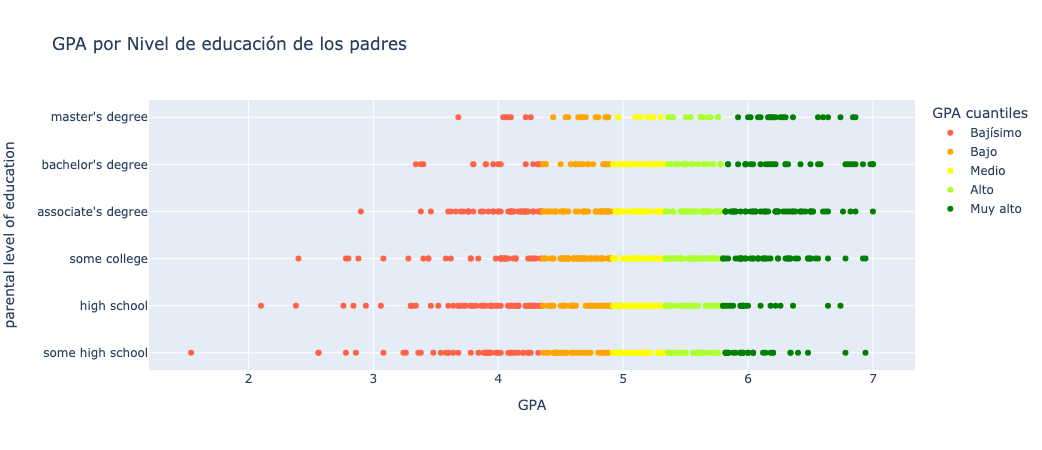

In [4]:
from IPython.display import Image
Image(filename='/Users/javieradonosotabilo/Documents/GitHub/Repositorio-MDS7202/Laboratorio 3/datos/newplot.png')

```
Escriba aqui su respuesta
```

El gráfico muestra una tendencia clara donde los estudiantes cuyos padres tienen un mayor nivel educativo, como “master’s degree” o “bachelor’s degree”, tienden a obtener mejores resultados académicos, los cuales se encuentran en los quintiles superiores de rendimiento. Sin embargo, también se observa una considerable variabilidad dentro de cada nivel educativo, lo que nos dice que aunque el nivel educativo de los padres influye positivamente en el rendimiento académico de sus hijos, no es el único factor determinante. Esto indica que existen otros elementos que también afectan el rendimiento, haciendo que algunos estudiantes con padres de menor nivel educativo logren igualmente altos desempeños.

## 4. Operaciones con tablas [2.0 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYWx5dTBkMGhhOTJmeGQzbDV5M21rNTN1NWVwMm1qbHd3cjh3Nmk4NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/13HBDT4QSTpveU/giphy.gif">
</p>



### 4.1 Carga de datos y concatenar dataset [0.2 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente).

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`.


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos.

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.


Hint: investigue el método `concat`

**Respuesta:**

In [1037]:
# Inserte su respuesta aquí
df_grades_1 = pd.read_json('students_grades_1.json')
df_grades_1.head()
df_grades_2 = pd.read_json('students_grades_2.json')
df_grades_2

df_grades_concat = pd.concat([df_grades_1, df_grades_2], ignore_index=True)
df_grades_concat

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,Bajísimo
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,Alto
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,Medio
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,Alto
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,Muy alto
...,...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,Medio
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,Bajísimo
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,Alto
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,Bajo


### 4.2 Análisis por Nivel Educacional Etnia de los Padres [0.8 Puntos]

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos.
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.


**Tabla de Resumen [0.5 Puntos]**


Para generar la tabla de resumen:

- [ ] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [ ] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión:

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas.
- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [ ] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'.

Utilizar la tabla de resultados esperados como guía para desarrollar este punto.


**Análisis [0.3 Puntos]**

Finalmente, responda las siguientes preguntas sobre el gráfico de caja que viene implementado a continuación. En este se muestra el GPA con respecto al nivel educacional, donde la variable de color es la etnicidad.

- [ ]  ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?


**Respuesta:**

In [1038]:
# Inserte su respuesta aquí
#GPA ya está dentro del dataframe, por lo que no es necesario nuevamente hacer este paso
# Simplificar el nivel educacional de los padres
education_dic = {
        "some high school": "school",
        "some college": "school",
        "high school": "school",
        "bachelor's degree": "college",
        "associate's degree": "college",
        "master's degree": "postgraduate"
    }

df_grades_concat['simple parental level of education'] = df_grades_concat['parental level of education'].map(education_dic)

# Agrupar por 'race/ethnicity' y 'simple_parental_level_of_education', obtener los promedios y el conteo
df_grades_concat_group = df_grades_concat.groupby(['race/ethnicity', 'simple parental level of education']).agg(
    math_score=('math score', 'mean'),
    reading_score=('reading score', 'mean'),
    writing_score=('writing score', 'mean'),
    GPA=('GPA', 'mean'),
    count=('names', 'count'),
    percentage=('names', lambda x: str(round((x.count() / df_grades_concat['names'].count()) * 100, 2)) + '%')
)

# Redondear los valores a dos decimales
df_grades_concat_group[['math_score', 'reading_score', 'writing_score', 'GPA']] = df_grades_concat_group[['math_score', 'reading_score', 'writing_score', 'GPA']].round(2)
    

In [1039]:
df_grades_concat_group

math_score  reading_score  \
race/ethnicity simple parental level of education                              
group A        college                                   4.83           5.05   
               postgraduate                              4.46           4.88   
               school                                    4.65           4.81   
group B        college                                   5.03           5.24   
               postgraduate                              5.03           5.81   
               school                                    4.69           4.90   
group C        college                                   5.03           5.36   
               postgraduate                              5.02           5.23   
               school                                    4.74           5.00   
group D        college                                   5.06           5.22   
               postgraduate                              5.35           5.63   
               school                                    4.99           5.13   
group E        college                                   5.53           5.45   
               postgraduate                              5.48           5.93   
               school                                    5.35           5.27   

                                                   writing_score   GPA  count  \
race/ethnicity simple parental level of education                               
group A        college                                      4.95  4.94     26   
               postgraduate                                 5.06  4.80      3   
               school                                       4.66  4.71     60   
group B        college                                      5.16  5.14     61   
               postgraduate                                 5.63  5.49      6   
               school                                       4.79  4.79    123   
group C        college                                      5.33  5.24    118   
               postgraduate                                 5.17  5.14     19   
               school                                       4.89  4.88    182   
group D        college                                      5.24  5.17     78   
               postgraduate                                 5.78  5.59     23   
               school                                       5.11  5.08    161   
group E        college                                      5.43  5.47     57   
               postgraduate                                 5.83  5.74      8   
               school                                       5.11  5.25     75   

                                                  percentage  
race/ethnicity simple parental level of education             
group A        college                                  2.6%  
               postgraduate                             0.3%  
               school                                   6.0%  
group B        college                                  6.1%  
               postgraduate                             0.6%  
               school                                  12.3%  
group C        college                                 11.8%  
               postgraduate                             1.9%  
               school                                  18.2%  
group D        college                                  7.8%  
               postgraduate                             2.3%  
               school                                  16.1%  
group E        college                                  5.7%  
               postgraduate                             0.8%  
               school                                   7.5%

In [1040]:
fig = px.box(
    df_grades_concat,
    x="simple parental level of education",
    y="GPA",
    color="race/ethnicity",
    hover_data=["GPA"],
)
fig.show()

    Análizar gráfica acá.

El gráfico de cajas muestra que existen diferencias en el GPA de los estudiantes según tanto el nivel educacional de los padres como la etnicidad. Los estudiantes cuyos padres tienen un nivel educacional de “college” o “postgraduate” tienden a tener un GPA más alto en comparación con aquellos cuyos padres tienen solo “school” como nivel educativo. Además, dentro de cada nivel educacional, también se observan variaciones en el GPA entre los diferentes grupos étnicos. Por ejemplo, los estudiantes del “group B” consistentemente presentan un rango de GPA más alto en comparación con otros grupos étnicos, independientemente del nivel educacional de los padres. Esto sugiere que tanto el nivel educacional de los padres como la etnicidad son factores que influyen en el rendimiento académico de los estudiantes, pero la magnitud de esa influencia puede variar entre los diferentes grupos.

**Resultados Esperados**

Esta tabla ilustra la estructura del dataframe a conseguir. Los valores son referenciales, no necesariamente son los esperados.

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.83 |            5.05 |            4.95 |  4.94 |      26 | 2.6 %        |
|  1 |                  | postgraduate                         |         4.46 |            4.88 |            5.06 |  4.80 |       3 | 0.3 %        |
|  2 |                  | school                               |         4.65 |            4.81 |            4.66 |  4.71 |      60 | 6.0 %        |
|  3 | group B          | college                              |         5.03 |            5.24 |            5.16 |  5.14 |      61 | 6.1 %        |
|  4 |                  | postgraduate                         |         5.03 |            5.81 |            5.63 |  5.49 |       6 | 0.6 %        |
|  5 |                  | school                               |         4.69 |            4.90 |            4.79 |  4.79 |     123 | 12.3 %       |
|  6 | group C          | college                              |         5.03 |            5.36 |            5.33 |  5.24 |     118 | 11.8 %       |
|  7 |                  | postgraduate                         |         5.02 |            5.23 |            5.17 |  5.14 |      19 | 1.9 %        |
|  8 |                  | school                               |         4.74 |            5.00 |            4.89 |  4.88 |     182 | 18.2 %       |
|  9 | group D          | college                              |         5.06 |            5.22 |            5.24 |  5.17 |      78 | 7.8 %        |
| 10 |                  | postgraduate                         |         5.35 |            5.63 |            5.78 |  5.59 |      23 | 2.3 %        |
| 11 |                  | school                               |         4.99 |            5.13 |            5.11 |  5.08 |     161 | 16.1 %       |
| 12 | group E          | college                              |         5.53 |            5.45 |            5.43 |  5.47 |      57 | 5.7 %        |
| 13 |                  | postgraduate                         |         5.48 |            5.93 |            5.83 |  5.74 |       8 | 0.8 %        |
| 14 |                  | school                               |         5.35 |            5.27 |            5.11 |  5.25 |      75 | 7.5 %        |


### 4.3 Joins, joins y más joins [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias.
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene registros de alumnos que ya no forman parte de la universidad, por lo que no deben ser parte de este análisis.


El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`).


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados o **alumnos que no pertenecen a la universidad**).

**To-Do**


- [ ] Cargar el `other_grades.csv`
- [ ] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [ ] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

**Respuesta:**

In [1041]:
#cargamos el archivo other_grades
df_other_grades = pd.read_csv('other_grades.csv')

In [1042]:
df_grades_outer = pd.merge(df_grades, df_other_grades, on = 'names', how = 'outer')
df_grades_outer

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,science score,history score
0,Aaron Morgan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,5.46
1,Aaron Oakden,male,group D,high school,free/reduced,none,4.96,5.44,5.14,5.18,Medio,3.76,4.60
2,Aaron Shelly,male,group D,associate's degree,standard,none,4.66,3.88,3.76,4.10,Bajísimo,3.88,3.90
3,Abigail Hall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.88,4.59
4,Adam Collins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.32,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,Zachary Glenn,male,group E,some college,standard,completed,6.94,6.22,5.86,6.34,Muy alto,6.94,5.70
1146,Zachary Torres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.48,6.92
1147,Zoey Campbell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05,1.72
1148,Zoey Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,3.50


Outer join incluye todos los registros de ambos DataFrames, ya sea que tengan o no coincidencias en la clave de unión (student_id). Esto significa que si un estudiante está presente en uno de los DataFrames pero no en el otro, su información aparecerá con valores NaN en las columnas faltantes.


In [1043]:
df_grades_left = pd.merge(df_grades, df_other_grades, on = 'names', how = 'left')
df_grades_left

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,Bajísimo,2.50,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,Alto,4.36,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,Medio,4.48,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,Alto,5.32,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,Muy alto,6.64,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,Medio,4.72,4.2
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,Bajísimo,1.96,3.6
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,Alto,4.54,4.1
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,Bajo,3.58,4.3


Left join incluye todos los registros del DataFrame izquierdo (df_grades) y solo los registros coincidentes del DataFrame derecho (other_grades). Si un estudiante no está en other_grades, las columnas de history score y science score aparecerán como NaN en la fila correspondiente.

In [1044]:
df_grades_right = pd.merge(df_grades, df_other_grades, on = 'names', how = 'right')
df_grades_right

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,science score,history score
0,Pam Otoole,female,group B,bachelor's degree,standard,none,5.32,5.32,5.44,5.36,Alto,4.42,4.00
1,Diane Olson,female,group C,some college,standard,completed,5.14,6.40,6.28,5.94,Muy alto,3.88,4.80
2,Sarah Flannery,female,group B,master's degree,standard,none,6.40,6.70,6.58,6.56,Muy alto,5.32,6.10
3,Stanley Chappell,male,group A,associate's degree,free/reduced,none,3.82,4.42,3.64,3.96,Bajísimo,3.82,3.70
4,Arnold Dodson,male,group C,some college,standard,none,5.56,5.68,5.50,5.58,Alto,4.60,5.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,Carson Brooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.72,1.54
1146,Ruby Reed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.71,4.59
1147,Zachary Torres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.48,6.92
1148,Eliana Gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.91,5.41


Right join es lo opuesto a un left join, incluyendo todos los registros del DataFrame derecho (other_grades) y solo los registros coincidentes del DataFrame izquierdo (df_grades). Si un estudiante no está en df_grades, las columnas correspondientes a df_grades tendrán valores NaN.

In [1045]:
df_grades_inner = pd.merge(df_grades, df_other_grades, on = 'names', how = 'inner')
df_grades_inner

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,GPA cuantiles,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,Bajísimo,2.50,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,Alto,4.36,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,Medio,4.48,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,Alto,5.32,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,Muy alto,6.64,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,Medio,4.72,4.2
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,Bajísimo,1.96,3.6
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,Alto,4.54,4.1
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,Bajo,3.58,4.3


Inner join incluye solo los registros que tienen coincidencias en ambos DataFrames. Esto significa que cualquier estudiante que no esté presente en ambos DataFrames será excluido del resultado.

### Inner Join utilizado
Dado que se menciona que algunos alumnos en other_grades.csv ya no forman parte de la universidad y no deben ser parte del análisis, el inner join es la opción más adecuada para este caso. Esto es porque solo incluirá a los estudiantes que están presentes en ambos DataFrames, asegurando que solo los estudiantes actuales sean parte del análisis final.

# Conclusión


Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>